In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
org_file=pd.read_csv('gender_classification_v7.csv')
org_file

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### This dataset contains 7 features and a label column.

* long_hair - This column contains 0's and 1's where 1 is __"long hair"__ and 0 is __"not long hair"__. 

* forehead_width_cm - This column is in CM's. This is the width of the forehead. 

* forehead_height_cm - This is the height of the forehead and it's in Cm's. 

* nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

* distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

* gender - This is either "Male" or "Female".

In [3]:
org_file.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


### EDA

In [4]:
org_file.tail(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4991,1,12.1,5.8,0,0,0,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female
4994,1,12.9,7.0,1,1,1,1,Male
4995,1,12.3,6.9,0,1,1,1,Male
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [5]:
org_file.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
org_file.describe(include='object')

,gender
count,5001
unique,2
top,Female
freq,2501


In [7]:
org_file.describe(include='all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,NaN
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,NaN
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,NaN


In [8]:
org_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
org_file.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [10]:
org_file.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [11]:
org_file.shape

(5001, 8)

In [12]:
org_file['gender'] = org_file['gender'].astype('category')

In [13]:
org_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   long_hair                  5001 non-null   int64   
 1   forehead_width_cm          5001 non-null   float64 
 2   forehead_height_cm         5001 non-null   float64 
 3   nose_wide                  5001 non-null   int64   
 4   nose_long                  5001 non-null   int64   
 5   lips_thin                  5001 non-null   int64   
 6   distance_nose_to_lip_long  5001 non-null   int64   
 7   gender                     5001 non-null   category
dtypes: category(1), float64(2), int64(5)
memory usage: 278.6 KB


In [14]:
org_file.duplicated().sum()

1768

In [15]:
org_file.drop_duplicates(inplace=True)

## Visualizations

In [16]:
gender_value=org_file.gender.value_counts()
gender_value

gender
Male      1783
Female    1450
Name: count, dtype: int64

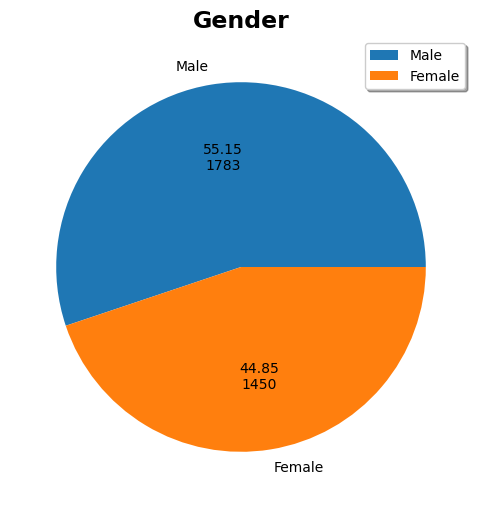

In [17]:
def fun(pct,all_values):
    absolute = (pct/100) * np.sum(all_values)
    return f"{pct :.2f}\n{absolute :.0f}"


plt.figure(figsize=(8,6))
plt.title("Gender",weight='bold',fontsize=17)
plt.pie(org_file.gender.value_counts().values,labels=org_file.gender.value_counts().index,autopct=lambda x:fun(x,org_file.gender.value_counts().values))
plt.legend(shadow=True)
plt.show()

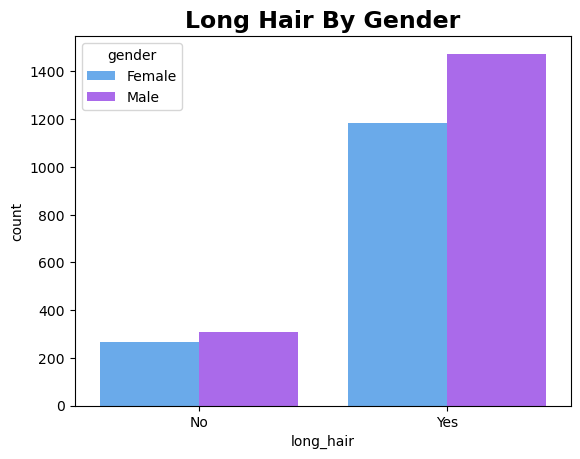

In [18]:
sns.countplot(x=org_file.long_hair,palette=("cool"),hue=org_file["gender"])
plt.title("Long Hair By Gender",weight='bold',fontsize=17)
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

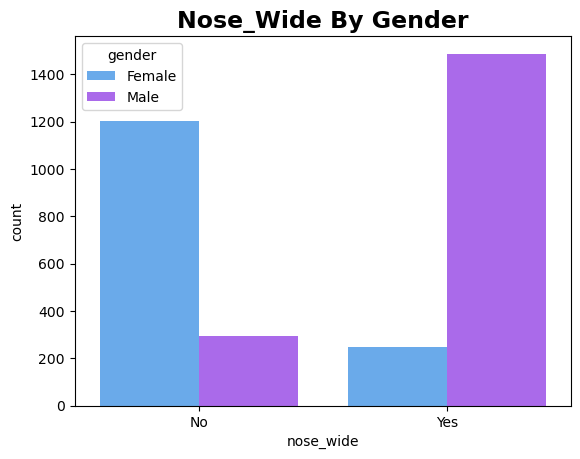

In [19]:
sns.countplot(x=org_file.nose_wide,palette=("cool"),hue=org_file["gender"])
plt.title("Nose_Wide By Gender",weight='bold',fontsize=17)
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

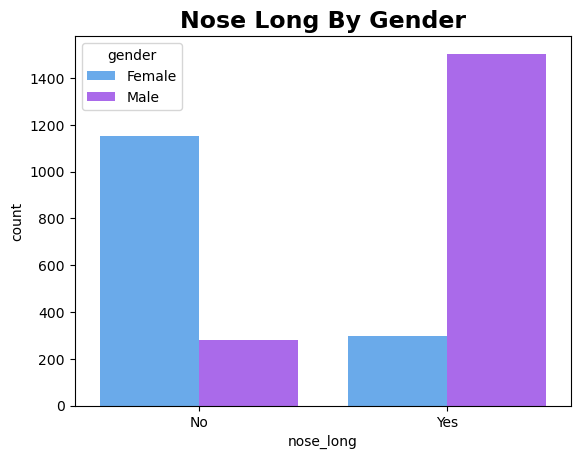

In [20]:
sns.countplot(x=org_file.nose_long,palette=("cool"),hue=org_file["gender"])
plt.title("Nose Long By Gender",weight='bold',fontsize=17)
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

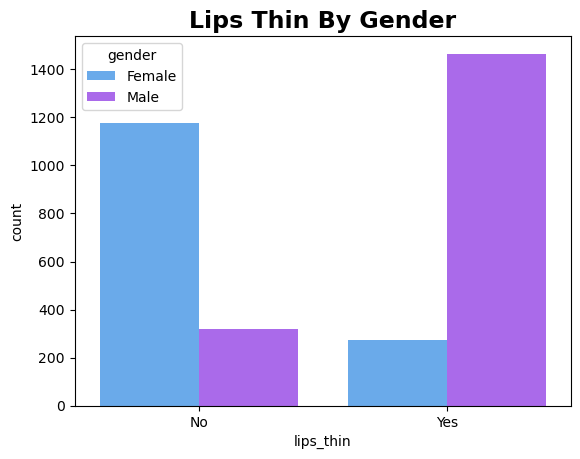

In [21]:
sns.countplot(x=org_file.lips_thin,palette=("cool"),hue=org_file["gender"])
plt.title("Lips Thin By Gender",weight='bold',fontsize=17)
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

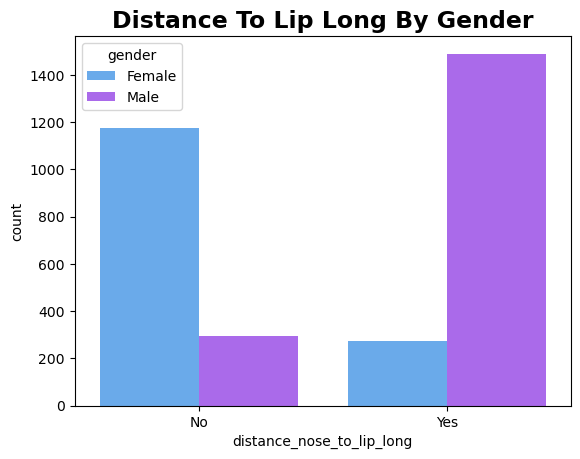

In [22]:
sns.countplot(x=org_file.distance_nose_to_lip_long,palette=("cool"),hue=org_file["gender"])
plt.title("Distance To Lip Long By Gender",weight='bold',fontsize=17)
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

In [23]:
org_file['gender'] = org_file['gender'].cat.codes
org_file

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


## MACHINE LEARNING

In [24]:
# Separate your data into predictor variables (X) and target variable (y)
X = org_file.drop('gender',axis =1)

y = org_file['gender']

In [25]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1
4990,1,12.6,5.7,0,0,1,0
4992,1,14.1,7.0,1,1,1,1
4993,1,11.6,5.9,0,0,0,1


In [26]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4986    1
4990    0
4992    1
4993    0
4995    1
Name: gender, Length: 3233, dtype: int8

In [47]:
#  Split your data into train dataset and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify =y, test_size = 0.25,random_state = 42)

### K-Nearest Neighbors

In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Training set score: 0.960
Test set score: 0.949


### Logistic Regression

In [49]:
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
print("Training set score: {:.3f}".format(Lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(Lr.score(X_test, y_test)))

Training set score: 0.954
Test set score: 0.939


### Decision Tree

In [50]:
DTc = DecisionTreeClassifier()
DTc.fit(X_train, y_train)
y_pred = DTc.predict(X_test)
print("Training set score: {:.3f}".format(DTc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DTc.score(X_test, y_test)))

Training set score: 0.998
Test set score: 0.943


### Support Vector Machine

In [51]:
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training set score: {:.3f}".format(SVM.score(X_train, y_train)))
print("Test set score: {:.3f}".format(SVM.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


### Random Forest

In [52]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training set score: {:.3f}".format(RF.score(X_train, y_train)))
print("Test set score: {:.3f}".format(RF.score(X_test, y_test)))

Training set score: 0.998
Test set score: 0.953
